In [1]:
import os
os.chdir('../') # insures use of models folder as python module 
# Any figures saved or data pickled in the current working 
# directly will be saved up one folder from here.
import pybamm
import models
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

# Run an Experiment

### This is perhaps the most intuitive way to solve a model. The method requires syntax that is human readable, even people not familiar with PyBaMM! Here we will run a simple charge and discharge cycle with two different C-rates. Note that we can use conditional statements, as in the discharge, but that they are not necessary, as in the charge. 

In [2]:
model = models.Cornish2021()

In [3]:
experiment = pybamm.Experiment(['Charge at 0.0211 A for 11.85 hours'])

sim = pybamm.Simulation(
    model=model,
    experiment=experiment,
    solver=pybamm.CasadiSolver(
        atol=1e-6,
        rtol=1e-6,
        #dt_max = .01,
        #extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
    ),
)

In [4]:
sim.solve()

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed


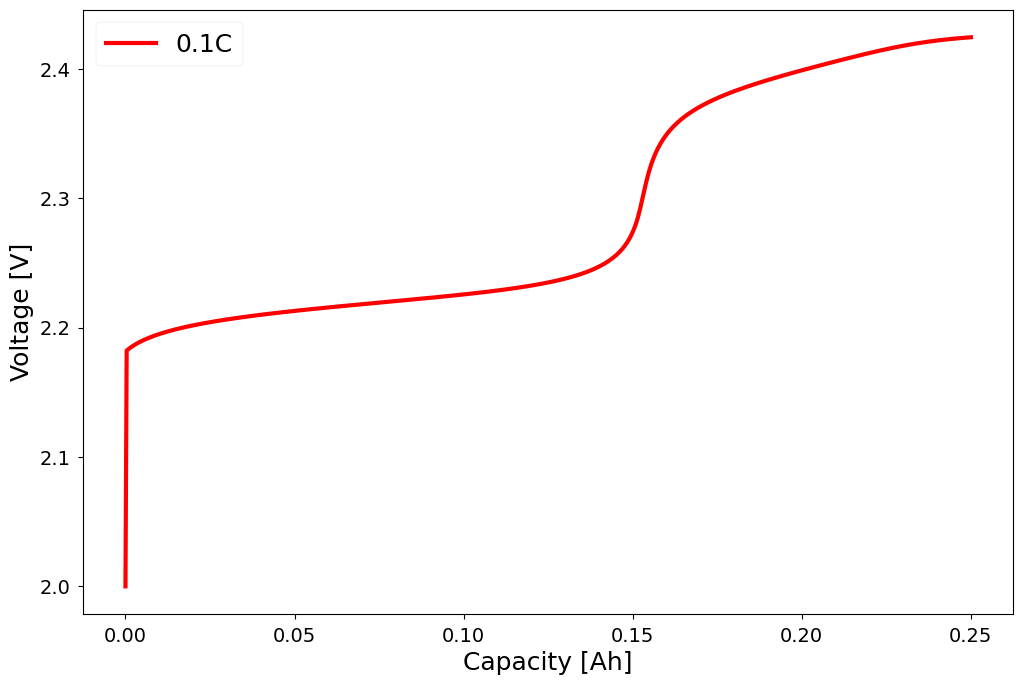

In [5]:
capacity = sim.solution['Capacity [Ah]'].entries
V = sim.solution["Terminal voltage [V]"].entries
plt.plot(capacity, V)

plt.legend(["0.1C",])
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]');

# Run the solve() method

### This method is more basic in the specification of time interval to simulate. However, the use of this method allows us to add complexity to the model inputs. For example, we can solve for a non-constant current charge.  

In [6]:
model = models.Cornish2021()

In [7]:
current = -0.0211
param = model.default_parameter_values
param.update({"Current function [A]": current})

sim = pybamm.Simulation(
    model=model,
    parameter_values = param,
    solver=pybamm.CasadiSolver(
        atol=1e-6,
        rtol=1e-6,
        #dt_max = .01,
        #extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
    ),
)

In [8]:
cap = 0.25
time_in_hours = cap/abs(current)
time_in_seconds = time_in_hours*3600
sim.solve([0,time_in_seconds])

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

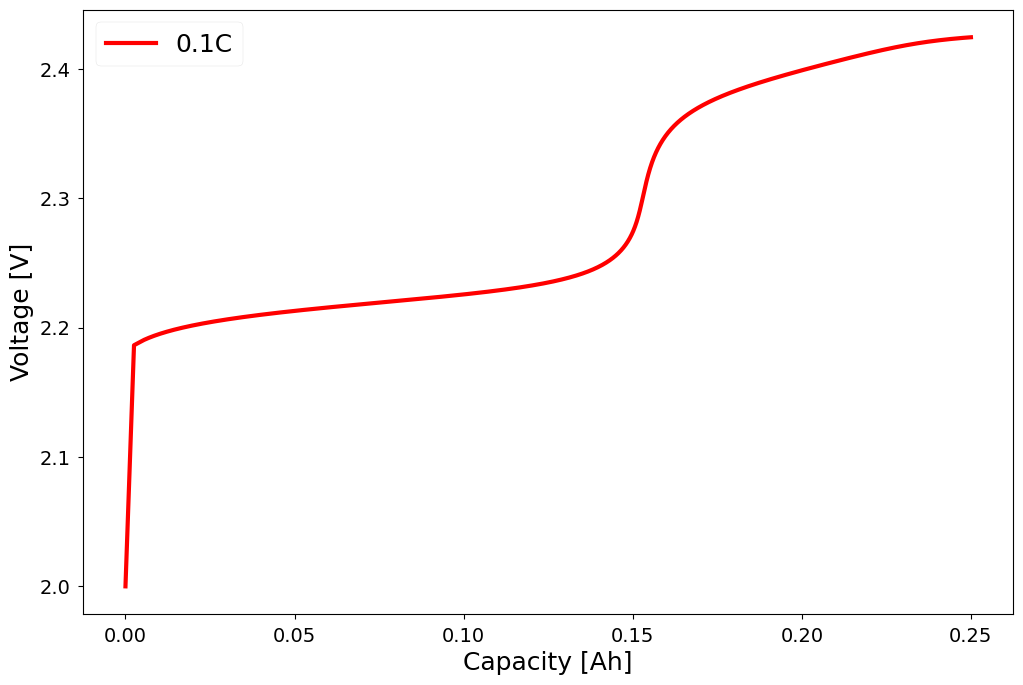

In [9]:
capacity = sim.solution['Capacity [Ah]'].entries
V = sim.solution["Terminal voltage [V]"].entries
plt.plot(capacity, V)

plt.legend(["0.1C",])
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]');

# Run the step() method

### This method requires a little bit more work on our part, but is helpful for debugging. Essentially, the experiment and solve methods will not return any data from the simulation if the there is a fatal error. Therefore, we can use the step method to obtain data about the simulation up to the part of the simulation which is causing issue. This in turn can help us understand what is causing the error. 

In [10]:
model = models.Cornish2021()

In [11]:
current = -0.0211
param = model.default_parameter_values
param.update({"Current function [A]": current})

sim = pybamm.Simulation(
    model=model,
    parameter_values = param,
    solver=pybamm.CasadiSolver(
        atol=1e-6,
        rtol=1e-6,
        #dt_max = .01,
        #extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
    ),
)

In [12]:
cap = 0.25
time_in_hours = cap/abs(current)
time_in_seconds = time_in_hours*3600
time = 0
step_size = 100
while time < time_in_seconds:
    sim.step(step_size)
    time += step_size

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

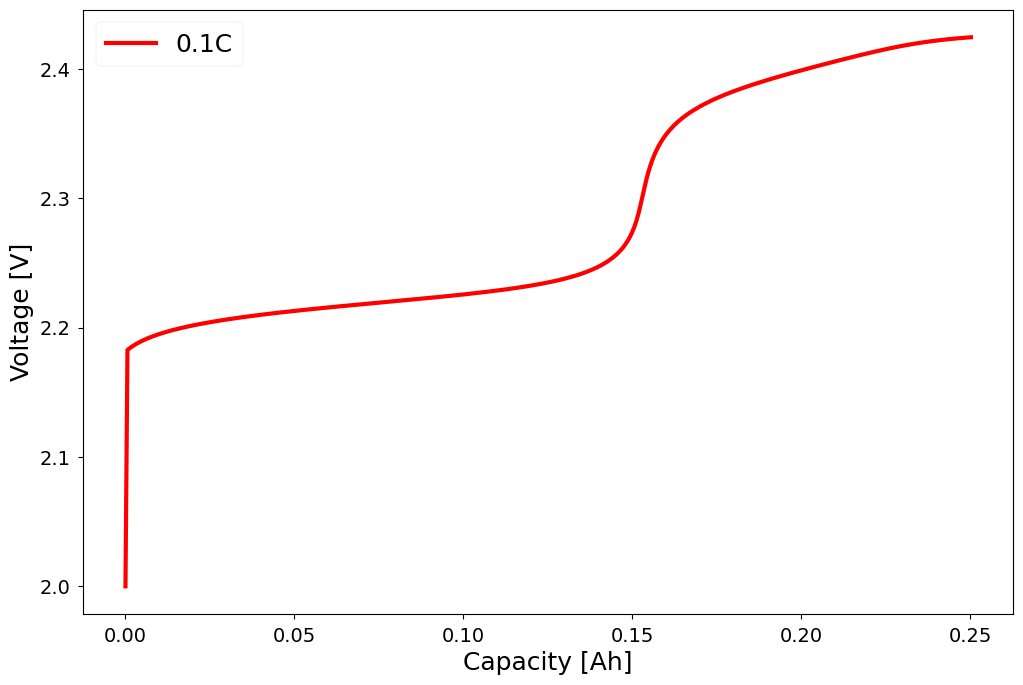

In [13]:
capacity = sim.solution['Capacity [Ah]'].entries
V = sim.solution["Terminal voltage [V]"].entries
plt.plot(capacity, V)

plt.legend(["0.1C",])
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]');